In [48]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [49]:
# Importing all the required all the Libraries
import keras,os
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Flatten,Dense,Input,Lambda

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Import Inception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Re-Size the Image into same Size
Image_Size = [224,224]

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
train_path = "/content/drive/MyDrive/Data_100/traing"
valid_path = "/content/drive/MyDrive/Data_100/validation"

In [53]:
inceptionv3 = InceptionV3(input_shape = Image_Size + [3],weights = "imagenet",include_top = False)

In [54]:
# Important don't Trian the Existing weights

for layer in inceptionv3.layers:
  layer.trainable = False

In [55]:
#Useful for getting the number of output classes

folder = glob("/content/drive/MyDrive/Data_100/traing/*")

In [56]:
folder

['/content/drive/MyDrive/Data_100/traing/Tomato_Late_blight',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Leaf_Mold',
 '/content/drive/MyDrive/Data_100/traing/Tomato__Target_Spot',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Septoria_leaf_spot',
 '/content/drive/MyDrive/Data_100/traing/Tomato_healthy',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Bacterial_spot',
 '/content/drive/MyDrive/Data_100/traing/Tomato__Tomato_mosaic_virus',
 '/content/drive/MyDrive/Data_100/traing/Tomato__Tomato_YellowLeaf__Curl_Virus',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Spider_mites_Two_spotted_spider_mite',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Early_blight']

In [57]:
len(folder)

10

In [58]:
#Flattening all the output of the Inception that i have downloaded above in cell no.16. Because, i'll be not having the Last LAyer

x = Flatten()(inceptionv3.output)

In [59]:
prediction = Dense(len(folder),activation = "softmax")(x)

In [60]:
#View the structure of the Model

#view the structure of the Model
model = Model(inputs = inceptionv3.input,outputs = prediction)

In [61]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [62]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [63]:
# tell the model what cost and optimization method to use
model.compile(
  loss='CategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### **Data Preprocessing**

In [64]:
#data preprocessing

train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [65]:
#Preprocess the Test size

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 833 images belonging to 10 classes.


In [67]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 107 images belonging to 10 classes.


In [68]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
)

Epoch 1/100
27/27 [==============================] - 19s 539ms/step - loss: 13.3256 - accuracy: 0.2881 - val_loss: 7.2973 - val_accuracy: 0.4393
Epoch 2/100
27/27 [==============================] - 13s 489ms/step - loss: 3.6009 - accuracy: 0.6206 - val_loss: 3.8162 - val_accuracy: 0.5514
Epoch 3/100
27/27 [==============================] - 14s 503ms/step - loss: 2.5918 - accuracy: 0.6951 - val_loss: 2.6548 - val_accuracy: 0.6262
Epoch 4/100
27/27 [==============================] - 13s 489ms/step - loss: 1.1848 - accuracy: 0.8019 - val_loss: 1.9893 - val_accuracy: 0.7009
Epoch 5/100
27/27 [==============================] - 13s 494ms/step - loss: 1.1889 - accuracy: 0.7935 - val_loss: 3.1556 - val_accuracy: 0.5981
Epoch 6/100
27/27 [==============================] - 13s 488ms/step - loss: 1.0314 - accuracy: 0.8115 - val_loss: 2.3908 - val_accuracy: 0.7009
Epoch 7/100
27/27 [==============================] - 13s 498ms/step - loss: 0.5490 - accuracy: 0.8908 - val_loss: 2.0577 - val_accuracy

In [69]:
r.history['loss'][:]

[13.325613021850586,
 3.600862979888916,
 2.5918240547180176,
 1.1848183870315552,
 1.1888706684112549,
 1.0314077138900757,
 0.5489659905433655,
 0.6939651370048523,
 0.6845859885215759,
 0.3964543342590332,
 0.30920538306236267,
 0.5242904424667358,
 0.36776015162467957,
 0.27704256772994995,
 0.3283423185348511,
 0.31849396228790283,
 0.3418947756290436,
 0.569939374923706,
 0.33307620882987976,
 0.27835360169410706,
 0.2266872674226761,
 0.21021755039691925,
 0.368541955947876,
 0.5430874228477478,
 0.7808560132980347,
 2.214010715484619,
 0.6154918670654297,
 1.2583692073822021,
 3.6175506114959717,
 2.2195072174072266,
 0.9129277467727661,
 0.7379509210586548,
 0.358755886554718,
 0.46654364466667175,
 0.4780631959438324,
 0.2943820357322693,
 0.1814875602722168,
 0.1390780806541443,
 0.14396443963050842,
 0.15475991368293762,
 0.21999569237232208,
 0.13691464066505432,
 0.270939439535141,
 0.1323772519826889,
 0.16639195382595062,
 0.12958963215351105,
 0.16339141130447388,
 0.0

In [70]:
r.history['accuracy'][:]

[0.2881152331829071,
 0.6206482648849487,
 0.6950780153274536,
 0.8019207715988159,
 0.7935174107551575,
 0.8115246295928955,
 0.8907563090324402,
 0.8523409366607666,
 0.8643457293510437,
 0.9219687581062317,
 0.9267706871032715,
 0.8979591727256775,
 0.9219687581062317,
 0.9363745450973511,
 0.9339736104011536,
 0.9399759769439697,
 0.9267706871032715,
 0.9015606045722961,
 0.942376971244812,
 0.9495798349380493,
 0.9567826986312866,
 0.9435774087905884,
 0.924369752407074,
 0.9123649597167969,
 0.9075630307197571,
 0.813925564289093,
 0.9135653972625732,
 0.9015606045722961,
 0.79111647605896,
 0.842737078666687,
 0.9207683205604553,
 0.9135653972625732,
 0.9435774087905884,
 0.942376971244812,
 0.9435774087905884,
 0.9555822610855103,
 0.9783913493156433,
 0.9747899174690247,
 0.9735894203186035,
 0.9807923436164856,
 0.9615846276283264,
 0.9687874913215637,
 0.9663865566253662,
 0.9771908521652222,
 0.9747899174690247,
 0.9723889827728271,
 0.9747899174690247,
 0.981992781162262,


In [71]:
r.history['val_loss'][:]

[7.297307014465332,
 3.8161563873291016,
 2.654794931411743,
 1.9893434047698975,
 3.1555564403533936,
 2.3908097743988037,
 2.0577309131622314,
 2.487281560897827,
 3.720731735229492,
 2.346190929412842,
 2.3072845935821533,
 2.286191940307617,
 1.9591262340545654,
 2.368380069732666,
 2.4765310287475586,
 1.877945065498352,
 2.9199612140655518,
 3.0312607288360596,
 2.4883947372436523,
 2.3716063499450684,
 2.2828922271728516,
 2.573551654815674,
 3.5556766986846924,
 3.201808214187622,
 9.774518013000488,
 4.967926979064941,
 4.5415239334106445,
 4.615878582000732,
 8.968605041503906,
 4.29362154006958,
 4.37585973739624,
 4.679457187652588,
 5.18767786026001,
 4.793497562408447,
 5.4793701171875,
 4.482537746429443,
 4.335867404937744,
 4.145114421844482,
 3.546233892440796,
 3.97835636138916,
 4.0289082527160645,
 3.9174139499664307,
 4.799831867218018,
 4.514102458953857,
 4.474385738372803,
 4.139613151550293,
 4.513453960418701,
 4.857227802276611,
 3.6555843353271484,
 5.52128

In [72]:
r.history['val_accuracy'][:]

[0.4392523467540741,
 0.5514018535614014,
 0.6261682510375977,
 0.7009345889091492,
 0.5981308221817017,
 0.7009345889091492,
 0.672897219657898,
 0.6915887594223022,
 0.6168224215507507,
 0.6822429895401001,
 0.6355140209197998,
 0.7009345889091492,
 0.7196261882781982,
 0.7289719581604004,
 0.7009345889091492,
 0.7102803587913513,
 0.7383177280426025,
 0.6542056202888489,
 0.6542056202888489,
 0.7196261882781982,
 0.7570093274116516,
 0.7289719581604004,
 0.6822429895401001,
 0.663551390171051,
 0.4579439163208008,
 0.6822429895401001,
 0.6915887594223022,
 0.7102803587913513,
 0.5233644843101501,
 0.7289719581604004,
 0.7570093274116516,
 0.7102803587913513,
 0.6915887594223022,
 0.7196261882781982,
 0.6915887594223022,
 0.7102803587913513,
 0.7102803587913513,
 0.7383177280426025,
 0.7757009267807007,
 0.7757009267807007,
 0.7476635575294495,
 0.7850467562675476,
 0.7102803587913513,
 0.7102803587913513,
 0.7289719581604004,
 0.7570093274116516,
 0.7570093274116516,
 0.719626188278

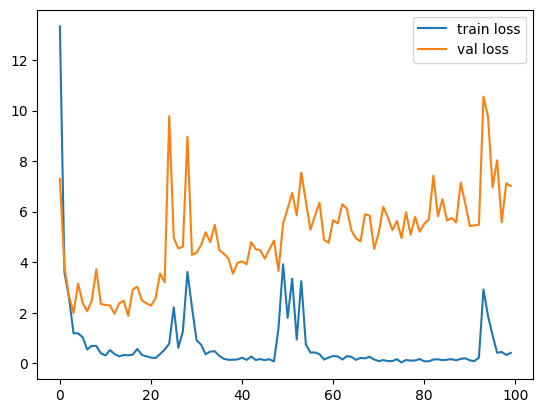

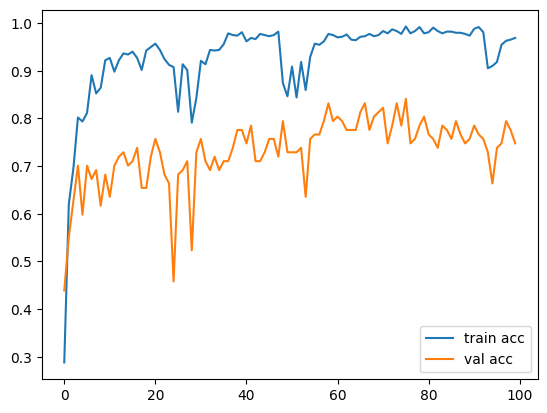

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_vgg19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_vgg19')

In [74]:
test_path ='/content/drive/MyDrive/Data_100/testing'

In [75]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [76]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 10 classes.


In [77]:
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

4/4 [==============================] - 2s 125ms/step


In [78]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 2, 2, 2,
       1, 2, 5, 2, 3, 2, 5, 2, 5, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       3, 3, 4, 4, 4, 4, 8, 4, 3, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 0,
       6, 1, 6, 1, 6, 1, 7, 6, 5, 7, 7, 4, 7, 7, 7, 7, 8, 5, 8, 8, 8, 8,
       8, 8, 8, 5, 8, 8, 8, 8, 8, 9, 6, 9, 9, 9, 3, 9, 9, 9, 9])

In [79]:
true_labels=test_set.classes

In [80]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [81]:
scores=model.evaluate(test_set)

4/4 [==============================] - 1s 101ms/step - loss: 3.8891 - accuracy: 0.7850


In [82]:
class_names = list(training_set.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [83]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [84]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 24ms/step


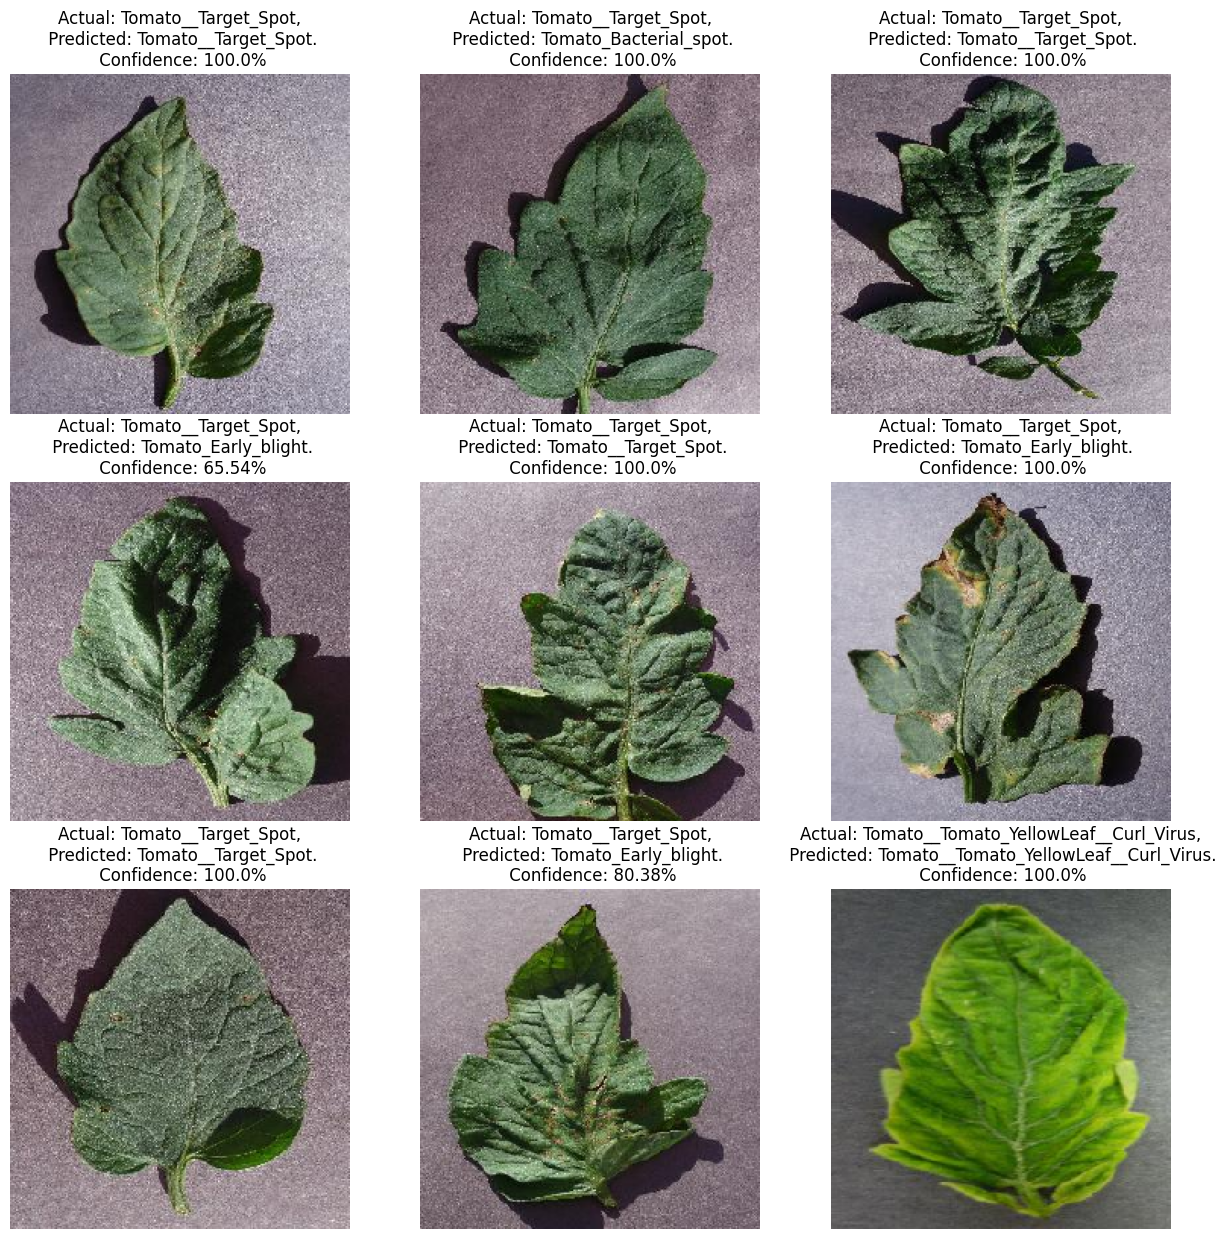

In [87]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 27ms/step
Predicted class index: 0
Predicted class name: Tomato_Bacterial_spot
Time taken for prediction: 0.0817 seconds


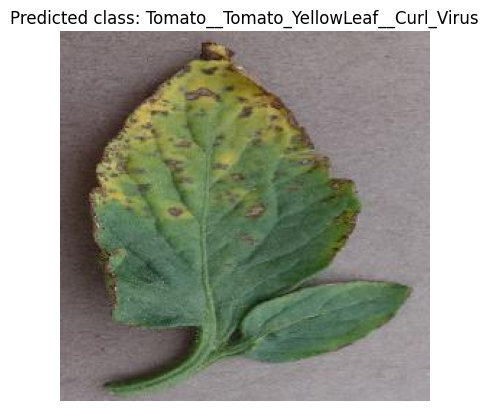

In [88]:
import time
img_path = '/content/drive/MyDrive/Data_100/testing/Tomato_Bacterial_spot/1dbd6b67-25f1-444e-81d8-cbb54213cbb4___GCREC_Bact.Sp 3528.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()
prediction_time = end_time - start_time
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Time taken for prediction: {prediction_time:.4f} seconds")
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


4/4 [==============================] - 1s 126ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.83      1.00      0.91        10
                        Tomato_Early_blight       0.64      0.88      0.74         8
                         Tomato_Late_blight       1.00      0.58      0.74        12
                           Tomato_Leaf_Mold       0.72      0.81      0.76        16
                  Tomato_Septoria_leaf_spot       0.89      0.73      0.80        11
Tomato_Spider_mites_Two_spotted_spider_mite       0.50      1.00      0.67         7
                        Tomato__Target_Spot       0.67      0.50      0.57         8
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.70      0.82        10
                Tomato__Tomato_mosaic_virus       0.87      0.87      0.87        15
                             

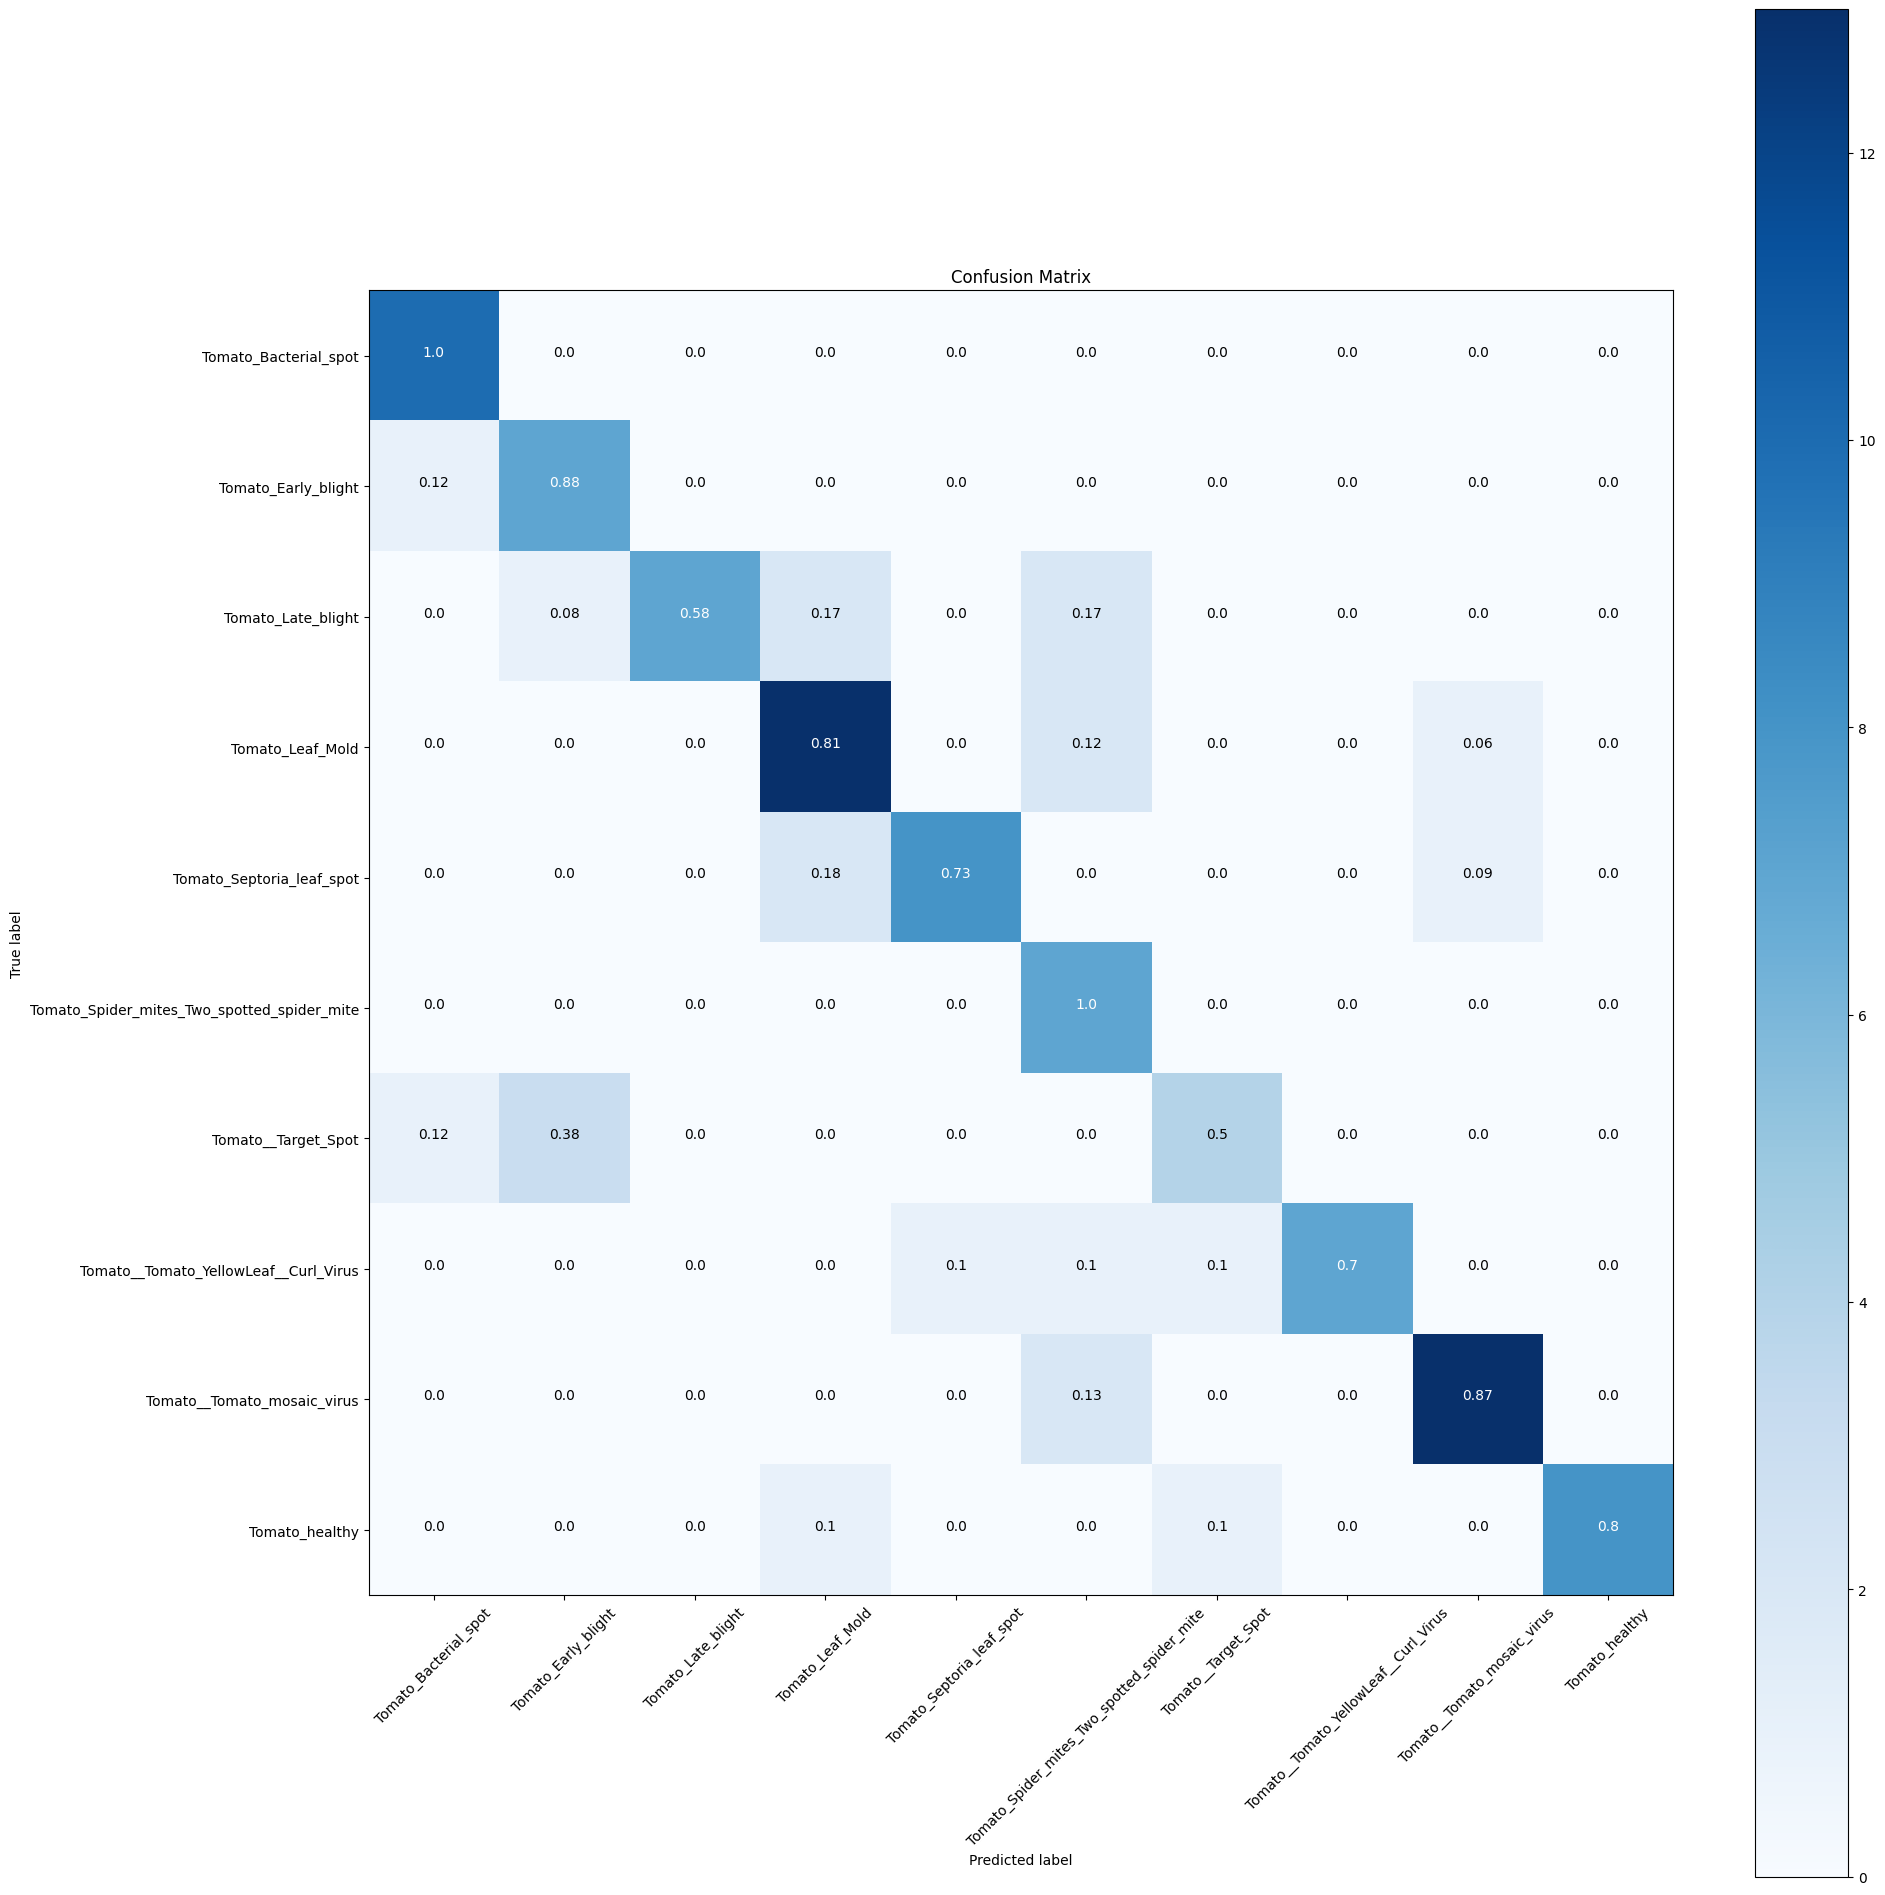

In [89]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
for key in training_set.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))